Import needed module

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

1. Read files and create a new DataFrame from both datasets

In [155]:
plant_1 = pd.read_csv("Plant_1_Generation_Data.csv")
plant_2 = pd.read_csv("Plant_2_Generation_Data.csv")
plant = pd.concat([plant_1, plant_2])
display(plant.head(11))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001.0,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001.0,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001.0,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001.0,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,15-05-2020 00:00,4135001.0,adLQvlD726eNBSB,0.0,0.0,0.0,NaN


2. Filter empty rows with dataset

In [156]:
plant.dropna(inplace=True)
display(plant.head(11))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001.0,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001.0,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001.0,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001.0,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
10,15-05-2020 00:00,4135001.0,bvBOhCH3iADSZry,0.0,0.0,0.0,6316803.0


3. Plot AC_POWER in the period of interest time 
4.  Plot MEAN_AC_POWER at the same plot 

I choose the first week for gererator in data. The period is specified between 18 to 24

In [180]:
plant["DATE_TIME"] = pd.to_datetime(plant["DATE_TIME"])
week_plant_1 = (plant["DATE_TIME"] >= "2020-05-16") & (plant["DATE_TIME"] <= "2020-05-24") & (plant["PLANT_ID"] == 4135001)
week_plant_2 = (plant["DATE_TIME"] >= "2020-05-16") & (plant["DATE_TIME"] <= "2020-05-24") & (plant["PLANT_ID"] == 4136001)
period_plant_1 = plant.loc[week_plant_1]
period_plant_2 = plant.loc[week_plant_2]
# display(period_plant_1)
# display(period_plant_2)

In [181]:
period_plant_1["MEAN_AC_POWER_1"] = period_plant_1.AC_POWER.rolling(7).mean() # point 4
period_plant_2["MEAN_AC_POWER_2"] = period_plant_2.AC_POWER.rolling(7).mean() # point 4

C:\Users\Radosław\AppData\Local\Temp\ipykernel_15628\3817992047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_plant_1["MEAN_AC_POWER_1"] = period_plant_1.AC_POWER.rolling(7).mean() # point 4
C:\Users\Radosław\AppData\Local\Temp\ipykernel_15628\3817992047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_plant_2["MEAN_AC_POWER_2"] = period_plant_2.AC_POWER.rolling(7).mean() # point 4


C:\Users\Radosław\AppData\Local\Temp\ipykernel_15628\696069311.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(period_plant_1["DATE_TIME"][:15068], period_plant_2["MEAN_AC_POWER_2"], label="MEAN_AC_POWER_2")


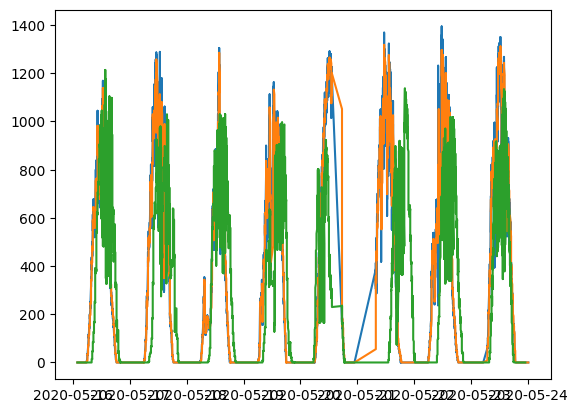

In [189]:
# period_plant_1.plot(x='DATE_TIME', y=['AC_POWER', 'MEAN_AC_POWER'], kind='line', figsize=(15, 5)) # point 3 with point 4
plt.plot(period_plant_1["DATE_TIME"], period_plant_1["AC_POWER"], label="AC_POWER")
plt.plot(period_plant_1["DATE_TIME"], period_plant_1["MEAN_AC_POWER_1"], label="MEAN_AC_POWER_1")
plt.plot(period_plant_1["DATE_TIME"][:15068], period_plant_2["MEAN_AC_POWER_2"], label="MEAN_AC_POWER_2")

In [ ]:
5. 